In [60]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt   

TF_ENABLE_ONEDNN_OPTS=0


len_max = 38
abcedario  =  ["a", "b" ,"c",  "d" , "e",  "f" , "g",  "h",  "i" , "j",  "k" , "l ", "m" , "n", "o",  "p", "q",  "r", "s",   "t",  "u" ,  "v" , "w" , "x", "y", "z" , "-", "/", "á" , "é" , "í", "ó",  "ú",  "ñ",  "1" , "2", "3", "4","5", "6", "7", "8","9","0"]
numeracion =  [97 , 98 , 99 , 100  ,101  ,102  ,103 , 104 , 105,  106 , 107 , 108  ,109 , 110 , 111 ,112 , 113 ,114 , 115 , 116  ,117 , 118  ,119 , 120  ,121 , 122 , 45,  47,  160, 130,  161,  162,  163,  164,  49,   50,  51, 52,  53,  54,  55, 56, 57,48]   # numeracioen de esta pagina https://elcodigoascii.com.ar/codigos-ascii-extendidos/letra-e-minuscula-acento-agudo-codigo-ascii-130.html

def ASCIIfuncLetter(letter):
    d = 0
    for i in range(len(abcedario)):
        if letter == abcedario[i]:
            d = numeracion[i]
            return d
    return d

def ASCIIfuncNum(num):
  d = " "
  for i in range(len(numeracion)):
      if num == numeracion[i]:
          d = abcedario[i]
          return d
  return d


def TxttoNum(word):
  Num = []
  for i in range(len(word)):
      Num.append(ASCIIfuncLetter(word.lower()[i]))
  return Num

def NumtoTxt(num):
  Txt = ""
  for i in range(len(num)):
      Txt = Txt + ASCIIfuncNum(num[i])
  return Txt

def Predic(Palabra, model):
  input = TxttoNum(Palabra)
  if len(input) < len_max:
      input.extend([0] * (len_max - len(input)))  # Rellenar con ceros
  elif len(input) > len_max:
      input = input[:len_max]  # Truncar si es más largo
  input = np.array(input, dtype='float32')
  input = np.reshape(input, (1, len_max))
  prediccion = model.predict(input,verbose=0)
  if prediccion > 0.5:
     prediccion = 1
  else:
      prediccion = 0
  return prediccion

In [ ]:
with open('data.txt', 'r') as archivo:
    lineas = archivo.readlines()
print(lineas)

entrenamiento = []
for linea in lineas:
    linea = linea.replace('\n', '')
    entrenamiento.append(linea)
print(entrenamiento)
entrenamiento = entrenamiento

['misdreavus\n', 'dratini\n', 'acetilcolina\n', 'angineel\n', 'vulpix\n', 'diltiazem\n', 'atolme\n', 'kricketot\n', 'floragato\n', 'desloratadina\n', 'metformina\n', 'machamp\n', 'alzil\n', 'bonsly\n', 'kingler\n', 'azelastina\n', 'arixtra\n', 'agomelatina\n', 'bulbasaur\n', 'perrserker\n', 'munna\n', 'propinoxato\n', 'dextran\n', 'adofen\n', 'steelix\n', 'sprigatito\n', 'dexketoprofeno\n', 'gyarados\n', 'wishiwashi\n', 'atenolol\n', 'minccino\n', 'roserade\n', 'naganadel\n', 'atoris\n', 'escavalier\n', 'burmy\n', 'actelsar\n', 'tapu koko\n', 'klang\n', 'anso\n', 'rampardos\n', 'poltchageist\n', 'aromatisse\n', 'spheal\n', 'diclofenaco\n', 'hatenna\n', 'tadbulb\n', 'porygon\n', 'piridoxi\n', 'corviknight\n', 'levofloxacino\n', 'slowpoke\n', 'sinistea\n', 'beedrill\n', 'probopass\n', 'victini\n', 'ferropãºas\n', 'urshifu\n', 'apaloz\n', 'crocalor\n', 'mabosstiff\n', 'abelcet\n', 'persian\n', 'incineroar\n', 'spectrier\n', 'ekans\n', 'xatu\n', 'grimer\n', 'terapagos\n', 'prednisona\n', '

In [ ]:
with open('data_etiqueta.txt', 'r') as archivo:
    lineas = archivo.readlines()
print(lineas)

entrenamiento_etiqueta = []
for linea in lineas:
    linea = linea.replace('\n', '')
    entrenamiento_etiqueta.append(int(linea))
print(entrenamiento_etiqueta)
entrenamiento_etiqueta = entrenamiento_etiqueta

['0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '1\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '1\n', '0\n', '1\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '0\n', '0\n', '0\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '0\n', '0\n', '1\n', '0\n', '1\n'

In [63]:
cantidad_0 = entrenamiento_etiqueta.count(0)
cantidad_1 = entrenamiento_etiqueta.count(1)

In [64]:
list_bien = []
falso_positivo = []
falso_negativo = []

for i in range(30):
    modelo = load_model("red_POKMED"  + str(10 + i*5) + ".keras")
    bien = 0
    f_p = 0
    f_n = 0
    for k in range(len(entrenamiento)):
      if Predic(entrenamiento[k], modelo) == entrenamiento_etiqueta[k]:
        bien += 1
      if entrenamiento_etiqueta[k] == 0 and Predic(entrenamiento[k], modelo) == 1:
        f_p += 1
      if entrenamiento_etiqueta[k] == 1 and Predic(entrenamiento[k], modelo) == 0:
        f_n += 1
    list_bien.append( bien / len(entrenamiento) )
    falso_positivo.append(f_p / cantidad_0 )
    falso_negativo.append(f_n / cantidad_1 )

In [65]:
print(list_bien)

[0.7330173775671406, 0.7361769352290679, 0.764612954186414, 0.7804107424960506, 0.7804107424960506, 0.8293838862559242, 0.7756714060031595, 0.764612954186414, 0.8041074249605056, 0.7962085308056872, 0.7962085308056872, 0.7946287519747235, 0.8009478672985783, 0.8341232227488151, 0.8183254344391785, 0.8120063191153238, 0.7977883096366508, 0.8072669826224329, 0.8056872037914692, 0.8246445497630331, 0.8278041074249605, 0.7725118483412322, 0.8072669826224329, 0.8009478672985783, 0.8135860979462876, 0.7977883096366508, 0.7851500789889415, 0.7993680884676145, 0.7962085308056872, 0.8041074249605056]


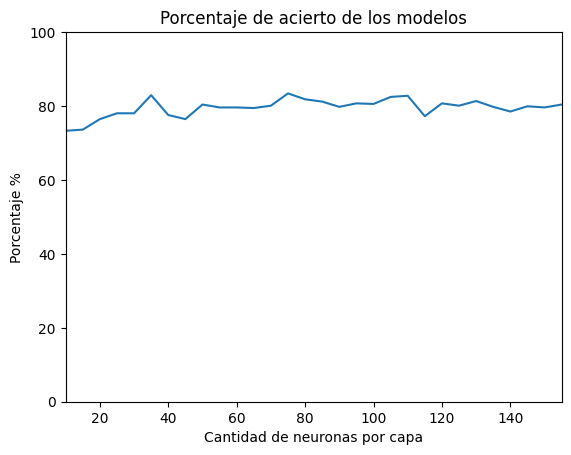

In [66]:
x = np.arange(10, 160, 5)
plt.plot(x,np.array(list_bien) * 100)
plt.title("Porcentaje de acierto de los modelos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

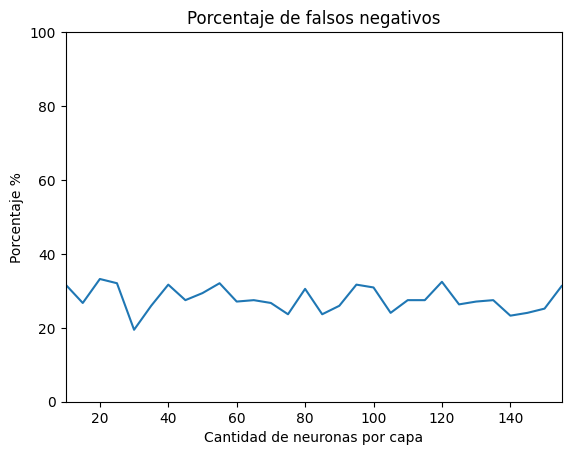

In [67]:
plt.plot(x,np.array(falso_negativo) * 100)
plt.title("Porcentaje de falsos negativos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

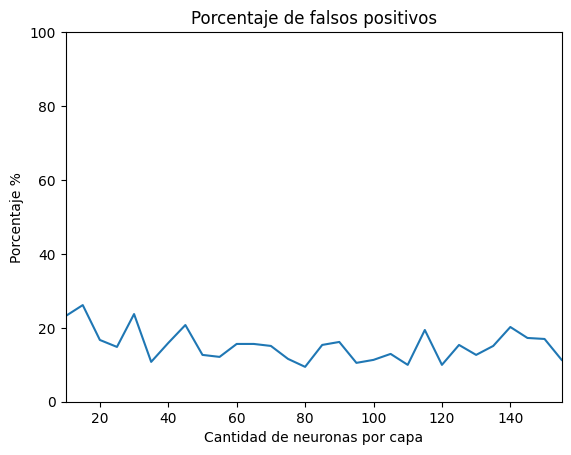

In [68]:
plt.plot(x,np.array(falso_positivo) * 100)
plt.title("Porcentaje de falsos positivos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

In [69]:
arg_max_nodo = np.argmax(list_bien)
arg_max_nodo
print("Red con más precisión tiene " + str(x[arg_max_nodo]) + " neuronas por capa")

Red con más precisión tiene 75 neuronas por capa
